# 12 Scales and Transformations

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('../../Data/diamonds.csv')
df.shape

(53940, 10)

In [3]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Let's continue looking at diamond price. As a reminder, this variable is quite skewed.



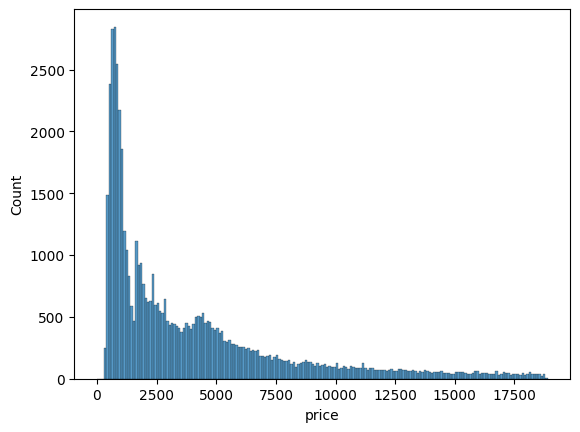

In [4]:
bins=np.arange(0, df['price'].max()+100, 100)
sns.histplot(data=df, x='price', bins=bins);

## Transforming an axis

Instead of trimming an axis, let's do a numerical transformation.

We'll use the `plt.xscale` function. This takes a string of the type of transform, such as `log`, or `semilog`.

Text(0.5, 0, 'The x-axis limits NOT are changed.\n They are only scaled to log-type')

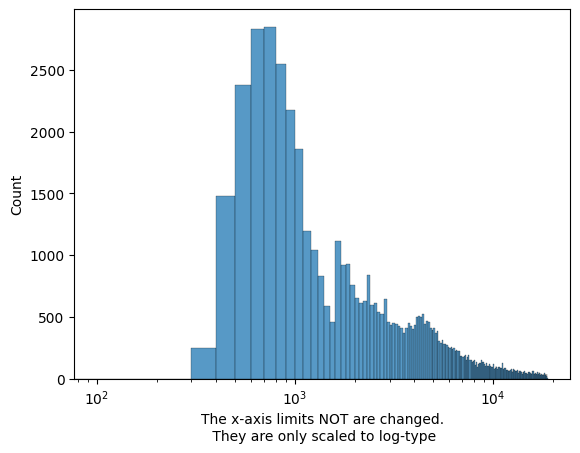

In [5]:
ax = sns.histplot(data=df, x='price', bins=bins);
ax.set_xscale('log')
ax.set_xlabel('The x-axis limits NOT are changed.\n They are only scaled to log-type')

## Transforming bins and axes

The plot isn't very interpretable; we also need to adjust the bin boundaries and axis ticks. 

The minimum price is 300 and the maximum 19000. The Log of these values, base 10, are 2.5 and 4.25. These give us the limits for our bins.

In [6]:
np.log10(df['price'].describe(), )

count    4.731911
mean     3.594702
std      3.600912
min      2.513218
25%      2.977724
50%      3.380392
75%      3.726258
max      4.274689
Name: price, dtype: float64

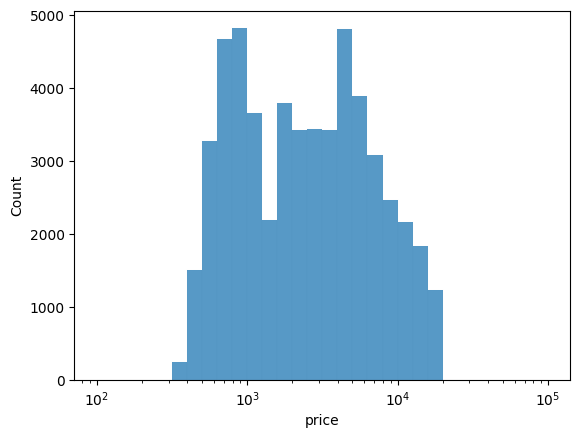

In [7]:
bins = 10 ** np.arange(2, 5+0.1, 0.1)

sns.histplot(data=df, x='price', bins=bins);
plt.xscale('log')

The plot looks a lot better now, showing a unimodal distribution, but the tick marks could be made more interpretable.

A three is about halfway between consecutive powers of 10 on a log scale.

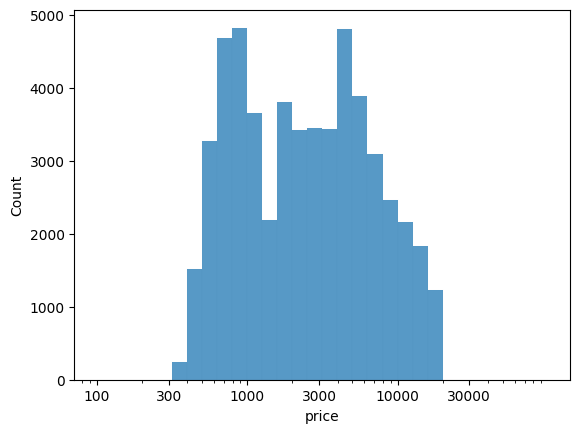

In [8]:
# Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(2, 5+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [100, 300, 1000, 3000, 10000, 30000]

# Convert ticks into string values, to be displaye dlong the x-axis
labels = [f'{v}' for v in ticks]

# Plot the histogram
sns.histplot(data=df, x='price', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels);